<a href="https://colab.research.google.com/github/gael-gao/data/blob/master/Hailstorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from time import time
img = cv.imread('exercise.png')
org_img = img
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


In [ ]:
#cv2_imshow(img)

In [ ]:
import cv2

# 高斯滤波核大小
blur_ksize = 5
# Canny边缘检测高低阈值
canny_lth = 50
canny_hth = 170
# 霍夫变换参数
rho = 1
theta = np.pi / 180
threshold = 5
min_line_len = 40
max_line_gap = 20
def process_an_image(img):
    # 1. 灰度化、滤波和Canny
    t0 = time()
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur_gray = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 1)
    edges = cv2.Canny(blur_gray, canny_lth, canny_hth)
    # 2. 标记四个坐标点用于ROI截取
    rows, cols = edges.shape
    #print(rows)
    #print(cols)
    points = np.array([[(0, 1296), (1380, 710), (3840, 970), (3840, 1620)]])
    roi_edges = roi_mask(edges, points)
    # 3. 霍夫直线提取
    drawing, lines = hough_lines(roi_edges, rho, theta, threshold, min_line_len, max_line_gap)
    print("done in %0.3fs" % (time() - t0))
    return drawing
    
def roi_mask(img, corner_points):
    # 创建掩膜
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, corner_points, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    # 统计概率霍夫直线变换
    lines = cv2.HoughLinesP(img, rho, theta, threshold, minLineLength=min_line_len, maxLineGap=max_line_gap)
    # 新建一副空白画布
    # drawing = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    # 在原图上绘制
    drawing = org_img
    draw_lines(drawing, lines)     # 画出直线检测结果
    return drawing, lines
def draw_lines(img, lines, color=[0, 0, 255], thickness=5):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

done in 0.093s


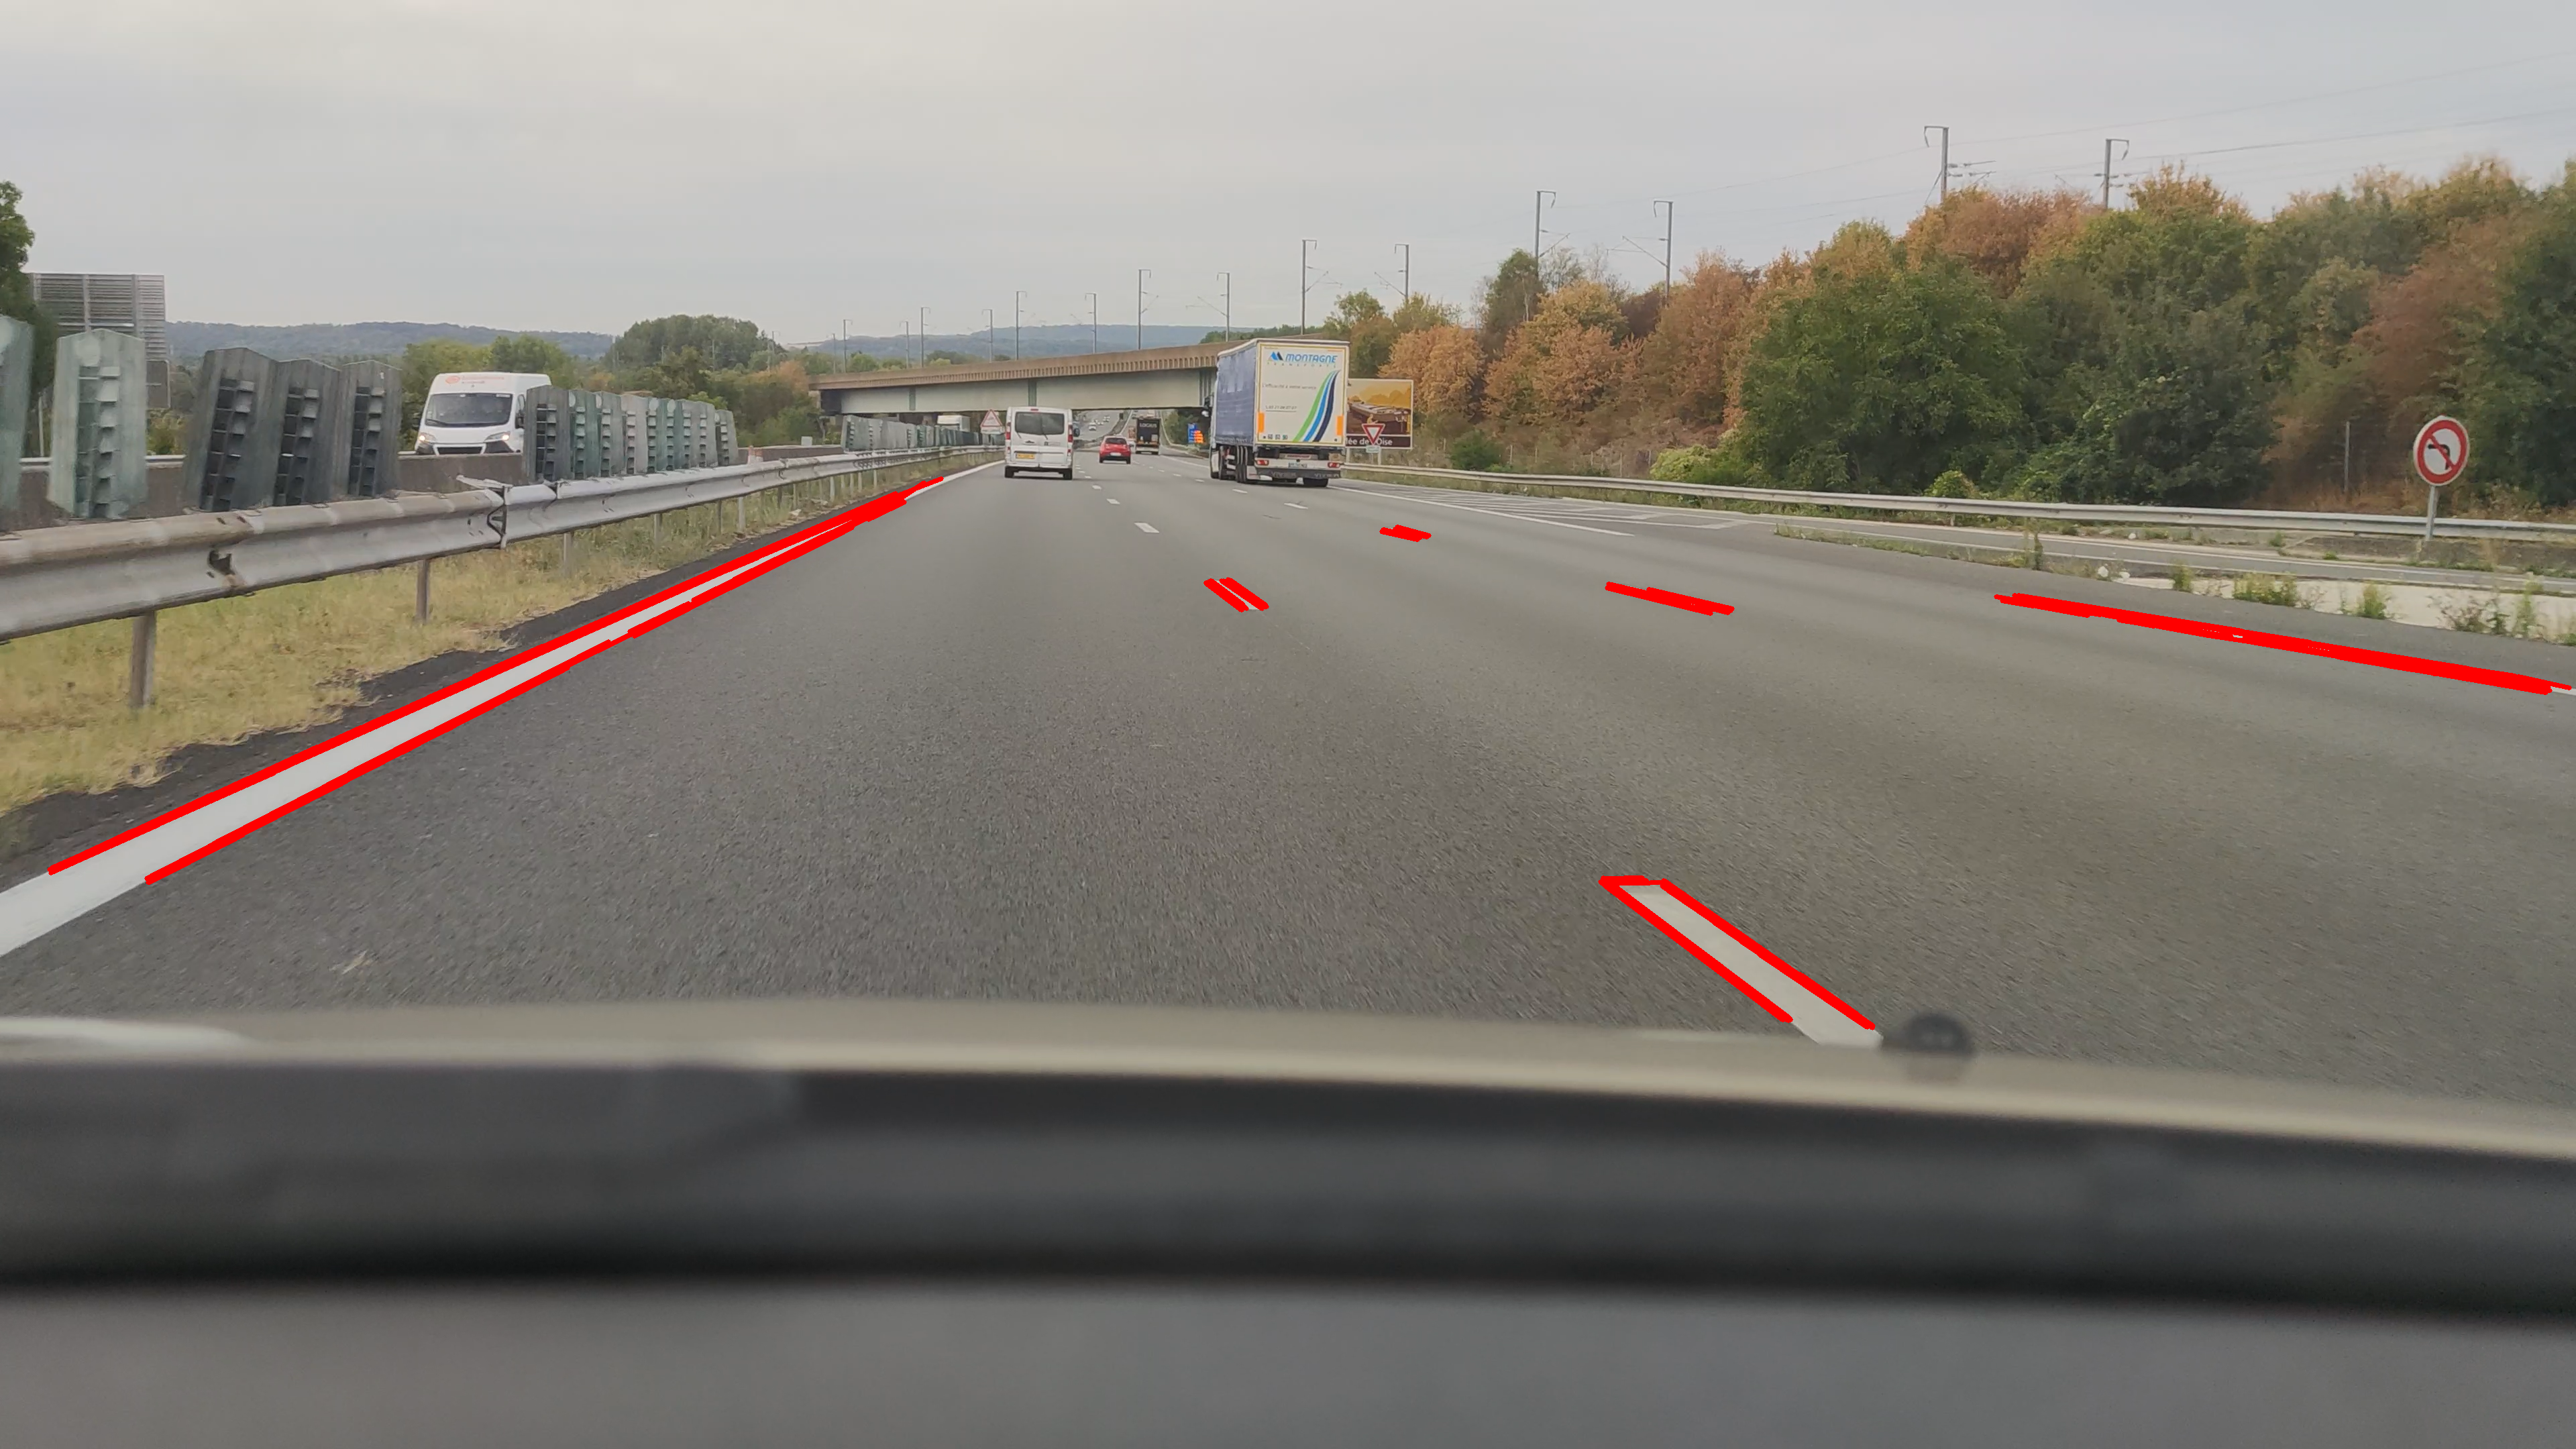

In [ ]:
#t0 = time()
cv2_imshow(process_an_image(img))
#print("done in %0.3fs" % (time() - t0))
